# Assignment 2 - Weather

For this assignment, create a Jupyter Notebook called *assignment2-weather.ipynb* that plots temperature (*dryBulkTemperature_Cesius*) using the *weatherreadings1.csv* file located on lecturers Github [page](https://github.com/andrewbeattycourseware/PFDA-courseware)

In [173]:
# import the necessary modules
import matplotlib.pyplot as plt 
import pandas as pd

# using seaborn-v0_8-whitegrid style for plotting as gridlines makes it easier to view data 
plt.style.use('seaborn-v0_8-whitegrid')

In [174]:
# read in the data
weather_data = pd.read_csv('weatherreadings1.csv')
print(weather_data.head(2))

                                 siteId        reportStartDateTime  \
0  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:15:00+00:00   
1  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:45:00+00:00   

           reportEndDateTime  collectionName  isPublic  isLatestVersion  \
0  2024-10-02T16:15:00+00:00               1      True             True   
1  2024-10-02T16:45:00+00:00               1      True             True   

   observationType softwareType  windDirection  relativeHumidity  ...  isDcnn  \
0                1  WeatherLink            322              70.4  ...   False   
1                1  WeatherLink            327              72.4  ...   False   

   longitude  latitude  height                                  id  \
0    -8.8545   53.5244      45  20241002oarq1xwy5re69kyhyyguw31uhh   
1    -8.8545   53.5244      45  20241002zafpyewy5we69kyhyytrtenn4a   

      localReportEndDateTime  externalSiteId  \
0  2024-10-02T16:15:00+00:00      1000013318   
1  2024-10-0

In [175]:
print(weather_data.shape)
print(weather_data.dtypes)

(89, 35)
siteId                             object
reportStartDateTime                object
reportEndDateTime                  object
collectionName                      int64
isPublic                             bool
isLatestVersion                      bool
observationType                     int64
softwareType                       object
windDirection                       int64
relativeHumidity                  float64
windSpeed_MilePerHour             float64
windSpeed_MetrePerSecond          float64
dryBulbTemperature_Fahrenheit     float64
dryBulbTemperature_Celsius        float64
wetBulbTemperature_Fahrenheit     float64
wetBulbTemperature_Celsius        float64
rainfallAmount_Inch                 int64
rainfallAmount_Millimetre           int64
rainfallRate_InchPerHour            int64
rainfallRate_MillimetrePerHour      int64
airPressure_InchOfMercury         float64
airPressure_Hectopascal           float64
dewPointTemperature_Fahrenheit    float64
dewPointTemperature_Celsi

This dataframe has 35 columns and 89 weather observations for the one weather station (*siteId - f2d42aea-f516-ec11-b76a-0003ff599499*) measured every 15 minutes. Only the *dryBulbTemperature_Celsius* and either time column (*reportStartDateTime* or *reportEndDateTime*). 

Using the *pandas.DataFrame.equals()* function, both of these columns contain the same data so either can be used. As both of these columns (*reportStartDateTime* or *reportEndDateTime*) is an object this may need to be changed to a datetime object.

equals() [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.equals.html)

In [176]:
weather_data['reportEndDateTime'].equals(weather_data['reportStartDateTime'])

True

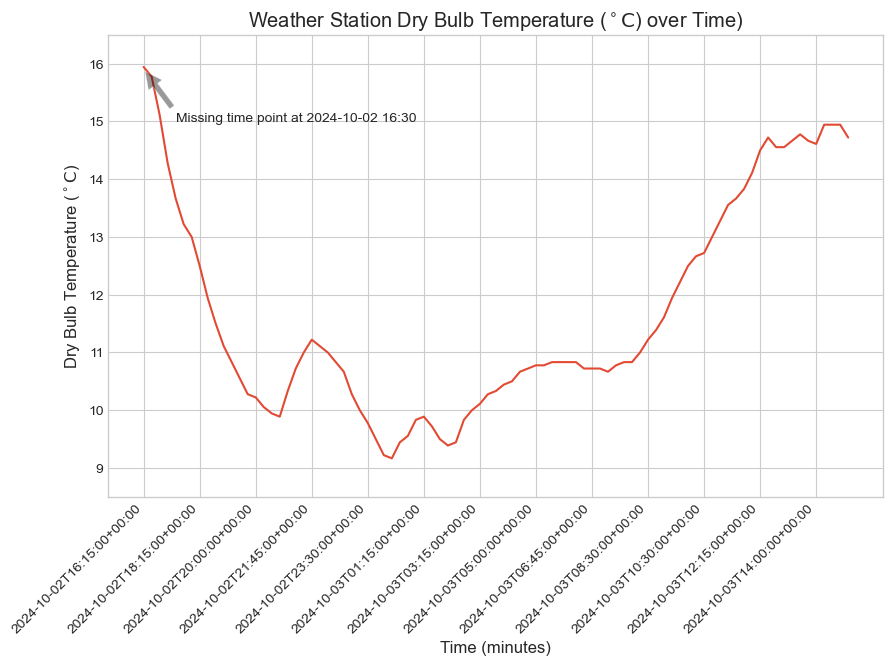

In [177]:
# The line plot can be used to show this data and is contained as ax.plot(). plt.show() is not needed as this is a 
# Jupyter Notebook.
X_TICKS = 7


fig, ax = plt.subplots(figsize = [10, 6])

ax.plot(weather_data['reportEndDateTime'], weather_data['dryBulbTemperature_Celsius'])
ax.set(ylim=(8.5, 16.5))
ax.set_xticks(range(0, len(weather_data['reportEndDateTime']), X_TICKS), weather_data['reportEndDateTime'][::X_TICKS], rotation =45,ha='right')
ax.set(xlabel='Time (minutes)', ylabel='Dry Bulb Temperature ($ ^\circ \mathrm{C}$)', title='Weather Station Dry Bulb Temperature ($ ^\circ \mathrm{C}$) over Time)')
ax.annotate('Missing time point at 2024-10-02 16:30', xy=(weather_data['reportEndDateTime'][0], 15.9), \
            xytext=(weather_data['reportEndDateTime'][4], 15),arrowprops=dict(facecolor='black', shrink=0.05,alpha=0.4));

Several things were done to improve the presentation of the plot;
- Rotate xticks so that the time is easier to view
- Only show every nth xtick as there were so many datapoints that reading the tick marks were hard. This was done using by adding a range for xticks so in this case only every 4th xtick label was shown. Documention used: [here](https://www.reddit.com/r/learnpython/comments/bvmphu/every_nth_axis_tick_strings/). 
- To add in ($ ^\circ \mathrm{C}$) for the temperature *LaTeX* (Tex markup) can be used: documention [here](https://electronics.stackexchange.com/questions/534702/how-can-i-make-a-degree-symbol-on-an-axis-label-of-my-matlab-graph#:~:text=So%20ylabel('%24%20%5E%5Ccirc%20%5C,%7D%24')%20should%20work.)
- The data is recorded every 15 minutes, but at 2024-10-02 16:30 there is a missing interval and this was noted as a plot annotation. 